In [8]:
import numpy as np
from matplotlib import pyplot as plt

from layers import Function, Layer, NeuralNetwork

import tensorflow_datasets as tfds
import tensorflow as tf

## Define functions

In [23]:
# sigmoid
sigma = lambda x: 1/(1+np.exp(-x))
sigma_d =  lambda x: np.exp(-x)/(1+np.exp(-x))**2
sigmoid = Function(sigma, sigma_d)

# relu
rel = lambda x: np.maximum(0,x)
rel_d = lambda x: x > 0
relu = Function(rel, rel_d)

# cost
def cost(Y, Yhat):
    loss = []
    for y, yhat in zip(Y.T, Yhat.T):
        loss.append(-(y*np.log(yhat) + (1-y)*np.log(1-yhat)))
    return np.mean(loss)

def cost_d(Y, Yhat):
    loss = []
    for y, yhat in zip(Y.T, Yhat.T):
        loss.append((yhat - y)/(yhat - yhat**2))
    loss = np.array(loss)
    return loss

cost_function = Function(cost, cost_d)

In [10]:
# check if actually corresponds

## Build dataset

In [11]:
BATCH_SIZE = 4

ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Define NN

In [24]:
nn = NeuralNetwork(.001, cost_function)
    
nn.add_layer(Layer((28*28, BATCH_SIZE), 28*28, relu))
nn.add_layer(Layer((28*28, BATCH_SIZE), 10, relu))

## Train

In [25]:
def preprocess(example):
    image, label = example["image"], example["label"]
    
    # preprocessing
    image = np.resize(image, (BATCH_SIZE, 28*28))
    image = np.moveaxis(image, [0,1], [1,0])
    
    label_vec = np.zeros((10, BATCH_SIZE))
    for u, l in enumerate(label):
        label_vec[l, u] = 1

    # correct datatypes
    image = image.astype(np.float64)
    
    image /= 255.0
    
    return image, label_vec

(784, 4) (10, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]
 [0. 1. 0. 0.]]


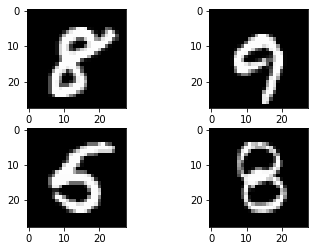

In [26]:
# test preprocess
example = next(iter(tfds.as_numpy(ds)))

image, label_vec = preprocess(example)
print(image.shape, label_vec.shape)
print(label_vec)

f, ax = plt.subplots(2,2)
ax[0,0].imshow(image[:,0].reshape((28,28)), cmap='gray')
ax[0,1].imshow(image[:,1].reshape((28,28)), cmap='gray')
ax[1,0].imshow(image[:,2].reshape((28,28)), cmap='gray')
ax[1,1].imshow(image[:,3].reshape((28,28)), cmap='gray')

In [27]:
TRAIN_STEPS = 100
    
costs = []
i = 1

for example in tfds.as_numpy(ds):
    print(f'--> running step: {i}', end='\r')
    
    # learning rate schedule
    if i == 25 or i == 50 or i == 75:
        nn.learning_rate /= 10
        print(f'====== setting learning rate to {nn.learning_rate}')
    
    image, label_vec = preprocess(example)
    
    cos = nn.train_step(image, label_vec)
    print(f'=== cost of step {i} was {cos}     ')
    costs.append(cos)
    
    if i == TRAIN_STEPS:
        break
    i += 1

=== cost of step 1 was nan     
=== cost of step 2 was nan     
=== cost of step 3 was nan     
=== cost of step 4 was nan     
=== cost of step 5 was nan     
=== cost of step 6 was nan     
=== cost of step 7 was nan     
=== cost of step 8 was nan     
=== cost of step 9 was nan     
=== cost of step 10 was nan     
=== cost of step 11 was nan     
=== cost of step 12 was nan     
=== cost of step 13 was nan     
=== cost of step 14 was nan     
=== cost of step 15 was nan     
=== cost of step 16 was nan     
=== cost of step 17 was nan     
=== cost of step 18 was nan     
=== cost of step 19 was nan     
=== cost of step 20 was nan     
=== cost of step 21 was nan     
=== cost of step 22 was nan     
=== cost of step 23 was nan     
=== cost of step 24 was nan     
====== setting learning rate to 0.0001
=== cost of step 25 was nan     
=== cost of step 26 was nan     
=== cost of step 27 was nan     
=== cost of step 28 was nan     
=== cost of step 29 was nan     
=== cost of s

C:\Users\phiga\AppData\Local\Temp\ipykernel_5624\1248962620.py:15: RuntimeWarning: divide by zero encountered in log
  loss.append(-(y*np.log(yhat) + (1-y)*np.log(1-yhat)))
C:\Users\phiga\AppData\Local\Temp\ipykernel_5624\1248962620.py:15: RuntimeWarning: invalid value encountered in multiply
  loss.append(-(y*np.log(yhat) + (1-y)*np.log(1-yhat)))
C:\Users\phiga\AppData\Local\Temp\ipykernel_5624\1248962620.py:15: RuntimeWarning: invalid value encountered in log
  loss.append(-(y*np.log(yhat) + (1-y)*np.log(1-yhat)))
C:\Users\phiga\AppData\Local\Temp\ipykernel_5624\1248962620.py:21: RuntimeWarning: invalid value encountered in divide
  loss.append((yhat - y)/(yhat - yhat**2))
C:\Users\phiga\AppData\Local\Temp\ipykernel_5624\1248962620.py:21: RuntimeWarning: divide by zero encountered in divide
  loss.append((yhat - y)/(yhat - yhat**2))
c:\Users\phiga\Documents\GitHub\numpy-neural-network\layers.py:32: RuntimeWarning: invalid value encountered in multiply
  d_z = d_a * self.activation.de

=== cost of step 34 was nan     
=== cost of step 35 was nan     
=== cost of step 36 was nan     
=== cost of step 37 was nan     
=== cost of step 38 was nan     
=== cost of step 39 was nan     
=== cost of step 40 was nan     
=== cost of step 41 was nan     
=== cost of step 42 was nan     
=== cost of step 43 was nan     
=== cost of step 44 was nan     
=== cost of step 45 was nan     
=== cost of step 46 was nan     
=== cost of step 47 was nan     
=== cost of step 48 was nan     
=== cost of step 49 was nan     
====== setting learning rate to 1e-05
=== cost of step 50 was nan     
=== cost of step 51 was nan     
=== cost of step 52 was nan     
=== cost of step 53 was nan     
=== cost of step 54 was nan     
=== cost of step 55 was nan     
=== cost of step 56 was nan     
=== cost of step 57 was nan     
=== cost of step 58 was nan     
=== cost of step 59 was nan     
=== cost of step 60 was nan     
=== cost of step 61 was nan     
=== cost of step 62 was nan     
=== c

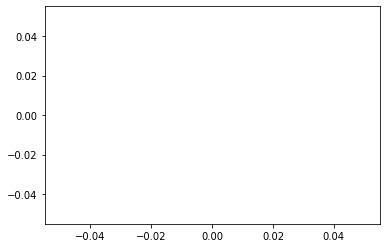

In [28]:
plt.plot(costs)
plt.show()

## Inference

=== evaluating image
=== this image is an [9 3 1 7]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
[[0.17703362 0.08925604 0.0970493  0.02508355]
 [0.00903339 0.10036131 0.04599159 0.10596797]
 [0.00216306 0.18716522 0.04137383 0.08354089]
 [0.01297471 0.15634408 0.04554058 0.06497675]
 [0.06819299 0.36101197 0.00941125 0.00324511]
 [0.00355722 0.00364446 0.26694827 0.01413626]
 [0.00093586 0.21233695 0.20298436 0.02014794]
 [0.06452959 0.02426917 0.35804381 0.02626265]
 [0.04231694 0.06775397 0.021484   0.33076412]
 [0.00460494 0.00424667 0.01247579 0.25682399]]


C:\Users\phiga\AppData\Local\Temp\ipykernel_11036\3107589359.py:1: RuntimeWarning: overflow encountered in exp
  sigma = lambda x: 1/(1+np.exp(-x))


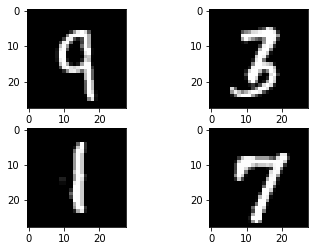

In [12]:
for example in tfds.as_numpy(ds):
    print(f'=== evaluating image')
    image, label = example["image"], example["label"]

    print(f'=== this image is an {label}')
    
    label_vec = np.zeros((10, BATCH_SIZE))
    for u, l in enumerate(label):
        label_vec[l, u] = 1
    print(label_vec)
    
    f, ax = plt.subplots(2,2)
    ax[0,0].imshow(image[0], cmap='gray')
    ax[0,1].imshow(image[1], cmap='gray')
    ax[1,0].imshow(image[2], cmap='gray')
    ax[1,1].imshow(image[3], cmap='gray')
    
    # preprocessing
    image_nn = np.resize(image, (BATCH_SIZE, 28*28))
    image_nn = np.moveaxis(image_nn, [0,1], [1,0])

    pred = nn.predict(image_nn)
    print(pred)
    
    plt.show()
    
    break